Scikit Learn

# 0. An end to end sklearn workflow

In [1]:
#get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("C:/Users/Ankur/Machine Learning Notes/matplotlib/heart-disease.csv")

In [2]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Create x (feature matrix)
x = heart_disease.drop("target",axis = 1)

#Create y (label)
y = heart_disease["target"]

In [4]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#  3. Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
clf.fit(x_train,y_train);

In [7]:
# Make Prediction
# y_label = clf.predict(np.array([0,2,4,6]))

In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2


In [9]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
y_test

47     1
34     1
294    0
66     1
80     1
      ..
237    0
4      1
141    1
50     1
76     1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.86      0.84      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[18,  5],
       [ 6, 32]], dtype=int64)

# 5. Improve a model
#try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set : {clf.score(x_test,y_test) * 100:.2f}")

In [15]:
# 6. sava a model and load it
import pickle

pickle .dump(clf,open("random_forest_model1.pkl","wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

## 1. Getting our data ready to be used with machine learning



# Three main things we have to do
# #     1. Split the data into features and label (usually x & y)
#     2. Filling (also called imputting) or disregarding missing values
#     3. Converting non-numerical values to numerical values (also called feature coding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x = heart_disease.drop("target",axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
#Split the data between test and trainig data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((242, 13), (61, 13), (242,), (61,))

# 1.1 Make sure data is numerical

In [22]:
car_sales = pd.read_csv("car-sales.csv")

In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [24]:
#split data in x/y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [25]:
#Turn the category into numbers
# One-hot encode categorical features in x
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_feature)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)

In [26]:
transformed_y = y.replace('[\$,]', '', regex=True).astype(float)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, transformed_y, test_size=0.2)

In [28]:
#Build machine learning model

##Error

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

In [29]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,150043.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,87899.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32549.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11179.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,213095.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,99213.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,45698.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54738.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60000.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31600.0


In [30]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,False,False,True,False,False,False,False,True
1,4,False,True,False,False,False,False,False,True,False
2,3,False,False,False,True,False,True,False,False,False
3,5,True,False,False,False,True,False,False,False,False
4,4,False,False,True,False,False,False,False,False,True
5,4,False,False,False,True,False,False,True,False,False
6,4,False,True,False,False,False,True,False,False,False
7,4,False,True,False,False,False,True,False,False,False
8,4,False,False,False,True,False,False,False,False,True
9,4,False,False,True,False,False,False,False,False,True


In [31]:
# Now you can fit the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
np.random.seed(42)
model.fit(x_train, y_train)

RandomForestRegressor()

model.score(x_test, y_test)

### Chooseing the right estimator/algorithm for your problem
Something to note:
    * sklearn refers to machine learning models, algorithms as estimators.
    * classfication problem - predicting a category (heart disease or not)
        * Sometimes you'll se clf (short for classifier) used as a classfication estimator
    * Regression problem - predicting a number (selling price a car)

# 2.1 Picking a machine learning model for a regression problem
Let's use the california housing dataset

In [32]:
#Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
housing_df = pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
housing_df["target"]= housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
# print("x_train shape:", x_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [36]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)
 
#Create the data
x = housing_df.drop("target",axis = 1)
y = housing_df["target"]

#Split into  train and test sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train,y_train)

#Check the score of the model (on the test set)
model.score(x_test,y_test)


0.5758549611440131

In [37]:
from sklearn.linear_model import Lasso
np.random.seed(42)
model_1 = Lasso()
model_1.fit(x_train,y_train)
model_1.score(x_test,y_test)

0.2841671821008396

# What if `ridge` didn't work or the score didn't fit our needs?
well, we could always try different model

# 2.2 Choosing an estimator for a classification problem

In [38]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x = heart_disease.iloc[:,:-1]
y = heart_disease.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = LinearSVC(dual='auto', max_iter=1000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8688524590163934

In [40]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.iloc[:,:-1]
y = heart_disease.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
newClf = RandomForestClassifier()
newClf.fit(x_train,y_train)
newClf.score(x_test,y_test)

0.8524590163934426

# 3. Fit the model/algorithm on our data and use it make prediction
3.2 Make Predictions using a machine learning model
#Use a train model to make predcition
1.predict()
2. predict_proba()

In [41]:
#Use a train model to make predcition
#   1.predict()
#   2. predict_proba()
clf.predict(x_test)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
#Compare prediction to truth label to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

In [45]:
#Predict_proba() return proability of a classification label
newClf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [46]:
# let's predict() on the same data
newClf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

# predict() can be also used for regression models

In [47]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [48]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1) 
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

y_preds = model.predict(x_test)

In [49]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [50]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [51]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4.2 Evaluating model using the scoring parameter

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis=1) 
y  = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=10)

model.fit(x_train,y_train)

y_preds = model.predict(x_test)

In [53]:
model.score(x_test,y_test)

0.8524590163934426

In [54]:
cross_val_score(model,x,y)

array([0.80327869, 0.8852459 , 0.81967213, 0.75      , 0.71666667])

In [55]:
np.random.seed(42)

#single training test split score
model_single_score = model.score(x_test,y_test)

#Take the mean of 5 - fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model,x,y))

#Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8150819672131148)

In [56]:
#Scoring parameter set to none by default
cross_val_score(model,x,y,scoring=None)

array([0.80327869, 0.81967213, 0.85245902, 0.76666667, 0.75      ])

# 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve 
3. Confusion matrix
4. Classification report

**Accuracy**

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1) 
y  = heart_disease["target"]
clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,x,y)

In [58]:
np.mean(cross_val_score)

0.8248087431693989

In [59]:
print(f"Heart Disease Classifier cross-validated Accuracy:{np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier cross-validated Accuracy:82.48%


 **Area under the receiver operating characteristic curve (AUC/ROC)**
 
 * Area under curve(AUC)
 * ROC curve
 
 ROC curver are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [61]:
from sklearn.metrics import roc_curve

#Fit the Classifier
clf.fit(x_train,y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [62]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [63]:
#Calculate the false positive rates
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#checks the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

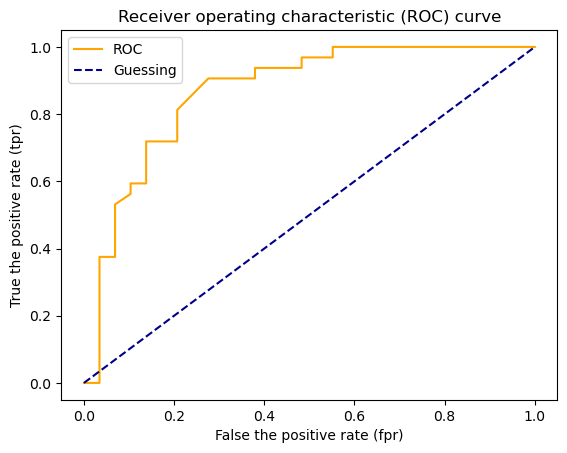

In [64]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plot a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #Customize the plot
    plt.xlabel("False the positive rate (fpr)")
    plt.ylabel("True the positive rate (tpr)") 
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

**Confusion Metrics**

A confusion matrix a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [66]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [67]:
#visualize the confusion matirx with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


<Axes: >

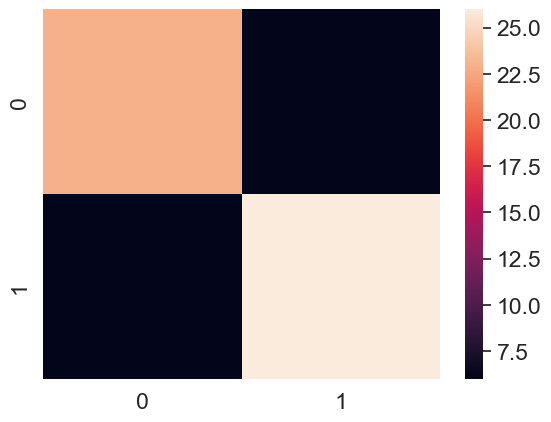

In [68]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

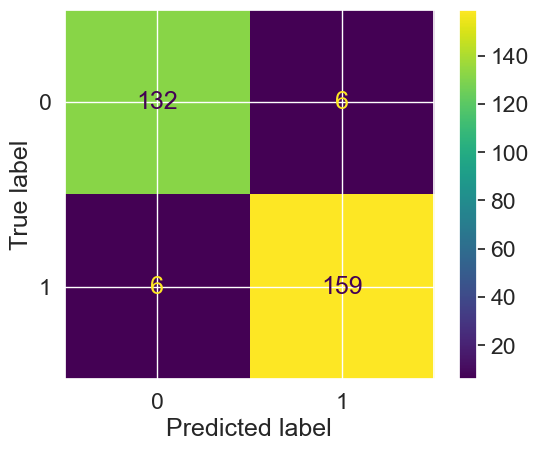

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = clf.predict(x)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

**Classification Report**

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# 4.2.2 Regression model evaluation metrics
 The Ones wer're going to cover are: 
1. R ^ 2 (pronounced r-squared) or coefficient of determination
2. Mean abosulte error
3. Mean Squared error

In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8065734772187598

In [72]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [73]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [74]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [75]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

***Mean Absolute Error (MAE)***

MAE is the average of the absolute difference between prediction and actual values. It gives you an idea of how wrong your models prediction are.

In [76]:
#MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [77]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values": y_preds})

df["difference"] = df["predicted values"] - df["actual values"]

df.head(10)

,actual values,predicted values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [78]:
#MAE using formula and difference
np.abs(df["difference"]).mean()

0.32659871732073664

** Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [79]:
#MSE
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [80]:
df["differences_squared"] = np.square(df["difference"])
df.head()

,actual values,predicted values,difference,differences_squared
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [81]:
#Calculate MSE by hand
squared = np.square(df["difference"])
squared.mean()

0.2534678520824551

In [82]:
df_large_error=df.copy()
df_large_error.iloc[0]["difference_sqaured"] = 16

In [83]:
df_large_error.head()

,actual values,predicted values,difference,differences_squared
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [84]:
#Calculate MSE with large error
df_large_error["differences_squared"].mean()

0.2534678520824551

In [85]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,difference,differences_squared
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [86]:
#Calculate MSE with large error
df_large_error["differences_squared"].mean()

0.7295421709146245

# 4.2.3 Finally using the scoring parameter

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [88]:
np.random.seed(42)

# cross validation accuracy
cvv_acc = cross_val_score(clf, x, y, cv=5,scoring=None)  #if scoring=None, estimator's default scoring evalution metrics is used.
cvv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [89]:
#cross validated accuraccy 
print(f"cross validated accuracy is : {np.mean(cvv_acc)*100:.2f}%")

cross validated accuracy is : 82.48%


In [90]:
np.random.seed(42)

cvv_acc = cross_val_score(clf, x, y, cv=5,scoring="accuracy") 
cvv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [91]:
#cross validated accuraccy 
print(f"cross validated accuracy is : {np.mean(cvv_acc)*100:.2f}%")

cross validated accuracy is : 82.48%


In [92]:
#Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [93]:
#cross validated precision
print(f"cross validated precision is : {np.mean(cv_precision)}")

cross validated precision is : 0.8329547346025924


In [94]:
#cross validated recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [95]:
#cross validated recall
print(f"cross validated recall is : {np.mean(cv_recall)}")

cross validated recall is : 0.8545454545454545


In [96]:
#cross validated f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [97]:
#cross validated recall
print(f"cross validated f1 is : {np.mean(cv_f1)}")

cross validated f1 is : 0.8426854603423346


Let's see the scroing parameter being used for a regression model


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [99]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3)
np.mean(cv_r2)

0.6545458023124507

In [100]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303784827892982

In [101]:
cv_mse

array([-0.52608501, -0.34777555, -0.37442498, -0.43875233, -0.46485455])

In [102]:
# Mean abosulte error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46680736586240323

In [103]:
cv_mae

array([-0.54516475, -0.41053355, -0.43822559, -0.46671669, -0.47339624])

# 4.3 Using different evaluation metrics as sklearn fucntions
 
The 3rd way to evaluate sklearn machine learning model/estimators is to using the sklearn.metrics modul

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Accuracy: 85.25
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print(f"R2 score: {r2_score(y_test,y_preds)*100:.2f}")
print(f"MAE score: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE score: {mean_squared_error(y_test,y_preds)}")

R2 score: 80.66
MAE score: 0.32659871732073664
MSE score: 0.2534678520824551


## Improving Model 

First prediction = baseling predictions.
First model = baseline model.

From data prespective:
* Could we collect more data? (generally ,the more data the better)
* Could we improve our data?

From a model prespective :
* Is there a better model which we use?
* Could we improve current model?

Hyperparameters vs. Parameter

* Parameters = model find these pattern in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve the ability to find the patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [106]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [107]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparametes by hand

   let's make 3 sets, training, validation and test.

In [108]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [109]:
def evaluate_preds(y_true,y_preds):
    """
    Perfrom evaluation comparison on y_true labels vs. y_preds labels
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precison": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"F1: {f1: .2f}")
    
    return metric_dict

In [110]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Make baseline predictions
y_preds = clf.predict(x_valid)

#Evalaute the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision:  0.81
Recall:  0.88
F1:  0.85


{'accuracy': 0.82, 'precison': 0.81, 'recall': 0.88, 'f1': 0.85}

In [111]:
np.random.seed(42)

#Create a second classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

#Make predictions with different hyperparametes
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision:  0.84
Recall:  0.84
F1:  0.84


In [112]:
np.random.seed(42)

#Create a second classifier with different hyperparameter
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_3.fit(x_train,y_train)

#Make predictions with different hyperparametes
y_preds_3 = clf_3.predict(x_valid)

# Evaluate the 2nd classifier 
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 80.00%
Precision:  0.81
Recall:  0.84
F1:  0.82


In [113]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter tunning with RandomizedSearchCV

In [114]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

#Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup RadomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                           n_iter=10, #no. of model to try
                           cv=5,
                           verbose=2)

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\

In [115]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [116]:
# Make prediction With the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision:  0.77
Recall:  0.86
F1:  0.81


# 5.3 HyperParameter tuning with GridSearchCV

In [117]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [118]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [119]:
from sklearn.model_selection import GridSearchCV, train_test_split


np.random.seed(42)

#Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

#Fit the GridSearchCV version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ankur\anaconda3\Lib\site-packages\

In [120]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [121]:
# Make prediction With the best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy: 81.97%
Precision:  0.77
Recall:  0.86
F1:  0.81


Let's Compare out different model metrics.

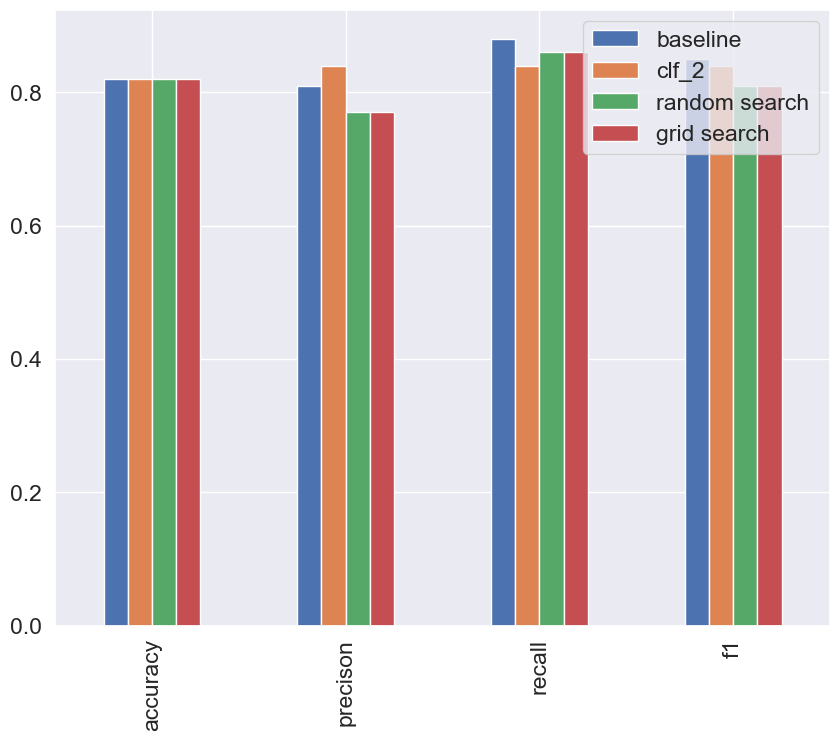

In [122]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics}
                              )
compare_metrics.plot.bar(figsize=(10,8));

# Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With python's `pickle` module
2. With the `joblist` mobile

**Pickle**

In [123]:
import pickle

#Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [124]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [126]:
loaded_pickle_model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [128]:
evaluate_preds(y_test, loaded_pickle_model.predict(x_test))

Accuracy: 81.97%
Precision:  0.77
Recall:  0.86
F1:  0.81


{'accuracy': 0.82, 'precison': 0.77, 'recall': 0.86, 'f1': 0.81}

 **Joblib**

In [132]:
from joblib import dump,load

#save model
dump(gs_clf, filename="gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']

In [135]:
#Import the model

loaded_joblib_model=load(filename="gs_random_forest_model_2.joblib")

In [136]:
# Make and evaluate joblib predictions
evaluate_preds(y_test,loaded_joblib_model.predict(x_test))

Accuracy: 81.97%
Precision:  0.77
Recall:  0.86
F1:  0.81


{'accuracy': 0.82, 'precison': 0.77, 'recall': 0.86, 'f1': 0.81}

# 7. Putting it all the together!

In [138]:
data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [139]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [140]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

step we want to do (all in one cell):
    
    1. Fill missing data
    2. Convert data to numbers
    3. Build a model on the data